안녕하세요 여러분?

이번 시간에는 WATER QUALITY 데이터 분석을 해 보도록 하겠습니다.

* 파이썬 코드는 GOOGLE COLAB 에서 실행하도록 합니다.
=> http://colab.research.google.com

* 실습 파일은 github 또는 강의게시판에 있습니다.
=> github: http://github.com/dscoool/waterai/
=> eCampus:

코드를 입력하며 같이 실습해 보도록 합시다!

실습을 할 때 주의할 점 - 반드시 손으로 코드를 일일히 타이핑해서 입력해 보고, **CTRL C + V 를 사용하지 마세요!! **코드를 복붙하면 실력이 늘지 않습니다!! 단, 주소 등은 복사, 붙여넣기 해도 되어요.





In [1]:
import numpy as np # 넘파이 - 수치 계산 라이브러리를 불러옵니다.
import pandas as pd # 판다스 - 데이터 처리, CSV 파일 입출력 라이브러리를 불러옵니다. (e.g. pd.read_csv)
import seaborn as sns # seaborn - 데이터 시각화 라이브러리입니다.
import matplotlib.pyplot as plt # matplotlib - 그래프 관련 라이브러리입니다.


# Water Quality
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


1. [Load and Check Data](#1)

1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)

1. [Missing Value](#6)
    * [Find Missing Value](#7)
    * [Fill Missing Value](#8)

1. [Visualization](#9)    
    
1. [Modeling](#10)

1. [Summary](#11)


<a id = "1"></a><br>
# 데이터 불러오기 및 앞부분 출력하기

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/dscoool/waterai/main/water_potability.csv") # 원본 파일의 url을 통해 파일을 불러옵니다.


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [10]:
data # 데이터를 저장하고 있는 변수, 'data'를 입력하고 실행해 봅시다!!

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [11]:
data.head(10) # .head(10) 명령어는 데이터의 맨 앞 10줄을 보여줍니다. 숫자 변경 가능.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


데이터를 쭉 살펴봅시다. 이 데이터는 어떤 데이터인가요?

원본 출처: https://www.kaggle.com/code/mustafaalkaan/water-quality-explanatory-data-analysis


In [8]:
data.describe() #데이터의 통계를 내 봅니다. 데이터를 묘사(describe)하는 명령입니다.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


count는 데이터의 개수,</br>
mean은 평균, </br>
std는 표준편차, </br>
min은 최소값, </br>
25%는 1번째 quartile (25% 순위에 해당하는 값),</br>
50%는 2번째 quartile (중앙값),</br>
75%는 3번째 quartile (75% 순위에 해당하는 값),</br>
max 는 최대값을 말합니다.</br>

<a id = "2"></a><br>
# 각 데이터 컬럼 설명

* pH: 산성/알칼리성 수치
* Hardness: 수질 경도
* Solids: 고형분
* Chloramines: 염소
* Sulfate: 황산염
* Conductivity: 전도도
* Organic Carbon: 유기탄소
* Trihalomethanes: 화학 물질
* Turbidity: 탁도
* Potability: 음용성, 마실 수 있는지 여부. 1은 마실 수 있음, 0은 마실 수 없음을 나타냄.

* pH : Acidity of water.
* Hardness: Hardness of water.
* Solids : Solids dissolved in water.
* Chloramines: Chloramines dissolved in water.
* Sulfate : Sulfate contained in water.
* Conductivity: Conductivity of electric of water.
* Organic Carbon : Organic Carbon dissolved in water.
* Trihalomethanes: Trihalomethanes are chemicals that may be found in water.
* Turbidity: Measure of light emitting.
* Potability: Classification of water if it is healthy or not. 1 is healthy, 0 is unhealthy.

In [9]:
data.info() # 데이터의 변수형을 나타냅니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


.info() 명령어는 데이터의 변수형 및 개수, Null이 아닌 개수를 나타냅니다.

* Non-null Count: 빈칸이 아닌 데이터의 수
* Dtype: 열의 데이터 타입
float64 = 64비트 실수(real number)
int = 정수(integer)


<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Potability
* Numerical Variable: pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes, Turbidity

<a id = "4"></a><br>
## Categorical Variable

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(data = data, x = data["Potability"])
plt.show()

* We clearly see that our data is not balanced.

<a id = "5"></a><br>
## Numerical Variables:
데이터 컬럼 중 숫자로 이루어진 컬럼은 아래와 같습니다:
* pH
* Hardness
* Solids
* Chloramines
* Sulfate
* Conductivity
* Organic Carbon
* Trihalomethanes
* Turbidity

위 변수의 분포를 알아보기 위해, 히스토그램(Histogram)을 그려 봅시다!!

In [12]:
def histplot(var): # 히스토그램을 그려 주는 함수를 정의(define)합니다.
    plt.figure(figsize = (6,3)) # 도표의 크기를 지정합니다. 여기서는 (가로 6 x 세로 3)
    sns.histplot(data = data, x = data[var], hue = data.Potability)
    plt.xlabel(var) # x 축 이름을 써 줍니다. 여기서는 var
    plt.ylabel("count") # y축 이름을 써 줍니다. 여기서는 count.
    plt.show() # .show() 명령어를 사용하면 도표(그림)을 그립니다.

먼저, 'ph' 컬럼을 대입하여 위 histoplot() 함수를 실행시켜 봅시다!!


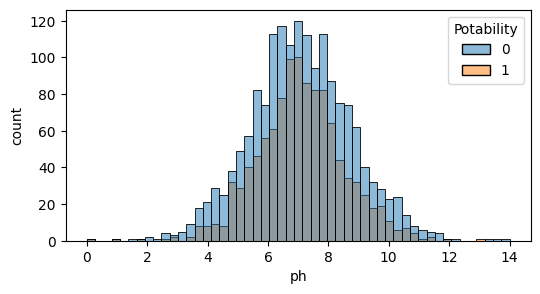

In [15]:
    histplot('ph') # ph 컬럼에 대한 히스토그램을 그립니다.


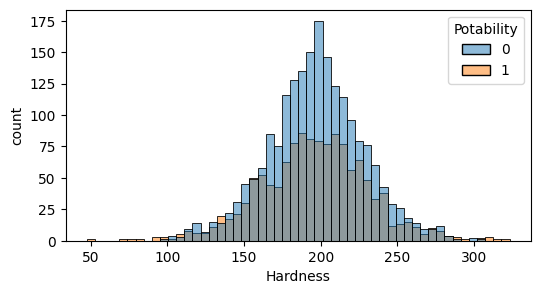

In [16]:
    histplot('Hardness') # Hardness 컬럼에 대한 히스토그램을 그립니다.


In [19]:
# 데이터 컬럼 중 숫자로 된 컬럼을 전부 나열합니다. 문자 컬럼은 빼 줍니다. => numvars.
# 숫자 컬럼을 아래 'numvars' 변수에 저장합니다.
# 이것으로 for문을 돌릴 예정입니다.
numvars = ["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]


In [21]:
numvars #numvars 의 값을 체크합시다!!

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

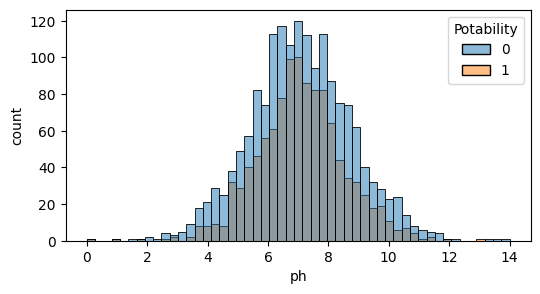

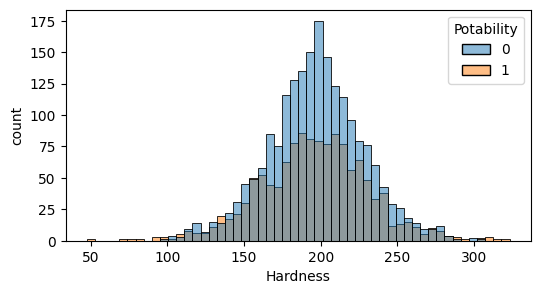

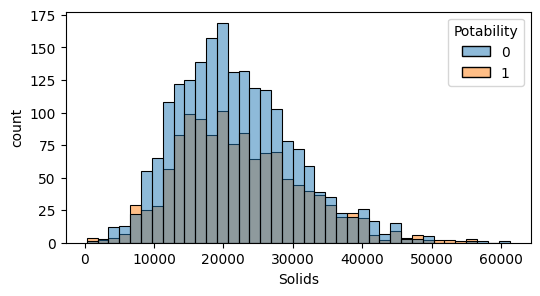

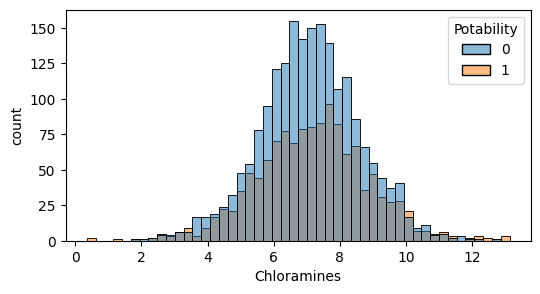

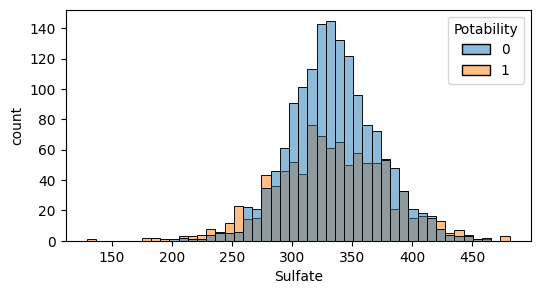

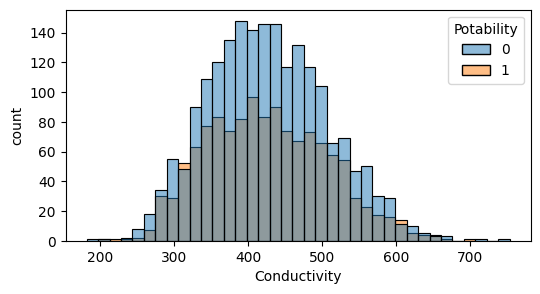

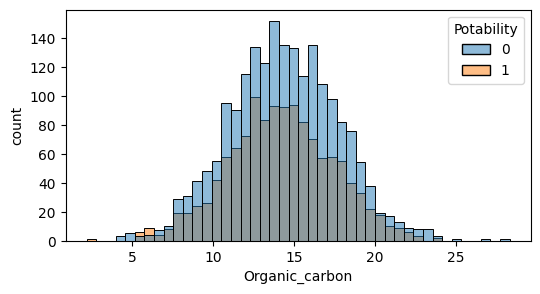

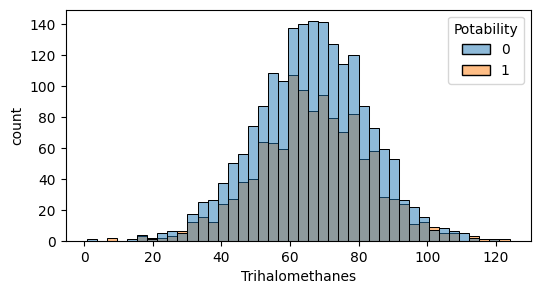

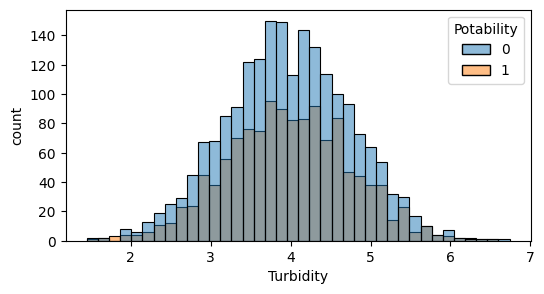

Ellipsis

In [23]:
# 자, for문이 나옵니다.
# numvars에 있는 "ph","Hardness","Solids", ... 를 n에 대입하고, 순서대로 실행합니다.
# 첫 번째 실행에서는 n = 'ph' 인 상태로 histoplot(n)을 실행합니다.
for n in numvars:
    histplot(n)

# 두 번째 실행에서는 n='Hardness"인 상태로 histoplot(n)을 실행합니다.
...
# 아홉 번째 실행에서는 n= 'Turbidity'인 상태로 histoplot(n)을 실행합니다.
# 아래 아홉 개의 histogram을 그립니다.

<a id = "6"></a><br>
# Missing Value


<a id = "7"></a><br>
## Find Missing Value

In [ ]:
data.isnull().sum()

<a id = "8"></a><br>
## Dropping Missing Values

In [ ]:
data = data.dropna()
data.isnull().sum()

<a id = "9"></a><br>
# Visualization

In [ ]:
numvars = ["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]
fig, axes = plt.subplots(3, 3, figsize=(9,9))

fig.suptitle('Distribution of Features')
plt.grid()
sns.boxplot(ax=axes[0, 0], data=data, x='ph')
sns.boxplot(ax=axes[0, 1], data=data, x='Hardness')
sns.boxplot(ax=axes[0, 2], data=data, x='Solids')
sns.boxplot(ax=axes[1, 0], data=data, x='Chloramines')
sns.boxplot(ax=axes[1, 1], data=data, x='Sulfate')
sns.boxplot(ax=axes[1, 2], data=data, x='Conductivity')
sns.boxplot(ax=axes[2, 0], data=data, x='Organic_carbon')
sns.boxplot(ax=axes[2, 1], data=data, x='Trihalomethanes')
sns.boxplot(ax=axes[2, 2], data=data, x='Turbidity')
plt.show()

* We can see that all our features distributed normally. Let's get to the machine learning.

<a id = "10"></a><br>
# Modeling

In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *
clf = setup(data, target = "Potability", session_id = 786)
compare_models()

In [ ]:
model = create_model("et")
predict = predict_model(model, data=data)
predict.head()

<a id = "11"></a><br>
# Summary
Extra Trees Classifier gave the best accuracy around mostly known classifying models. So we decided to go on with it. It turned out %90 of accuracy. I've used PyCaret library in this notebook. It automatically fits all classification models to your specified data and feature and returns all the accuracies for each model.